In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv('6mar.csv')

accu=df[df.Timelevel==1]
accu_1_d=pd.DataFrame(accu)

print(accu_1_d)

      Route  Column        Date       Time  Timelevel  Start_Lat  Start_Lng  \
343       1     362  02/05/2019      08:28          1  23.545995  87.292665   
344       1     363  02/05/2019      08:29          1  23.544361  87.291554   
345       1     364  02/05/2019      08:29          1  23.542695  87.290403   
346       1     365  02/05/2019      08:29          1  23.541416  87.290750   
347       1     366  02/05/2019      08:30          1  23.540587  87.292603   
348       1     367  02/05/2019      08:30          1  23.539169  87.293209   
349       1     368  02/05/2019      08:31          1  23.537094  87.294185   
350       1     369  02/05/2019      08:31          1  23.536083  87.295783   
351       1     370  02/05/2019      08:32          1  23.535086  87.297500   
352       1     371  02/05/2019      08:32          1  23.535909  87.299185   
353       1     372  02/05/2019      08:32          1  23.536223  87.300952   
354       1     373  02/05/2019      08:33          

In [6]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Timelevel==1]
accu_1_d=pd.DataFrame(accu)

print(len(accu_1_d))
X=accu_1_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_1_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)


728
[[37 14  2  7]
 [15 96  3  5]
 [ 0  1  6  0]
 [ 6  5  0 22]]
              precision    recall  f1-score   support

        Fast       0.64      0.62      0.63        60
      Normal       0.83      0.81      0.82       119
        Slow       0.55      0.86      0.67         7
   Very Fast       0.65      0.67      0.66        33

    accuracy                           0.74       219
   macro avg       0.66      0.74      0.69       219
weighted avg       0.74      0.74      0.74       219



0.7351598173515982

In [ ]:
# from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Timelevel==2]
accu_2_d=pd.DataFrame(accu)

print(len(accu_2_d))

X=accu_2_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_2_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)


In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Timelevel==3]
accu_3_d=pd.DataFrame(accu)

print(len(accu_3_d))

X=accu_3_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_3_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

1426
[[ 96  25   0   7]
 [ 20 243   2   2]
 [  2   9  12   0]
 [  4   0   0   6]]
              precision    recall  f1-score   support

        Fast       0.79      0.75      0.77       128
      Normal       0.88      0.91      0.89       267
        Slow       0.86      0.52      0.65        23
   Very Fast       0.40      0.60      0.48        10

    accuracy                           0.83       428
   macro avg       0.73      0.70      0.70       428
weighted avg       0.84      0.83      0.83       428



0.8341121495327103

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Timelevel==4]
accu_4_d=pd.DataFrame(accu)

print(len(accu_4_d))

X=accu_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

1519
[[ 45  38   3   4]
 [ 19 264   6   1]
 [  0  21  36   0]
 [  4   9   0   6]]
              precision    recall  f1-score   support

        Fast       0.66      0.50      0.57        90
      Normal       0.80      0.91      0.85       290
        Slow       0.80      0.63      0.71        57
   Very Fast       0.55      0.32      0.40        19

    accuracy                           0.77       456
   macro avg       0.70      0.59      0.63       456
weighted avg       0.76      0.77      0.76       456



0.7697368421052632

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Zone=='highway']
accu_highway_d=pd.DataFrame(accu)

print(len(accu_highway_d))

X=accu_highway_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_highway_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

897
[[72  8  3 17]
 [12 18  0  8]
 [ 4  0  0  0]
 [29  6  0 93]]
              precision    recall  f1-score   support

        Fast       0.62      0.72      0.66       100
      Normal       0.56      0.47      0.51        38
        Slow       0.00      0.00      0.00         4
   Very Fast       0.79      0.73      0.76       128

    accuracy                           0.68       270
   macro avg       0.49      0.48      0.48       270
weighted avg       0.68      0.68      0.68       270



0.6777777777777778

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Zone=='normal_city']
accu_nc_d=pd.DataFrame(accu)

print(len(accu_nc_d))

X=accu_nc_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

1591
[[158  36   0   3]
 [ 40 213   3   1]
 [  0   2   5   0]
 [  6   3   0   8]]
              precision    recall  f1-score   support

        Fast       0.77      0.80      0.79       197
      Normal       0.84      0.83      0.83       257
        Slow       0.62      0.71      0.67         7
   Very Fast       0.67      0.47      0.55        17

    accuracy                           0.80       478
   macro avg       0.73      0.70      0.71       478
weighted avg       0.80      0.80      0.80       478



0.803347280334728

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[df.Zone=='market']
accu_market_d=pd.DataFrame(accu)

print(len(accu_market_d))

X=accu_market_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_market_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

2841
[[ 92  32   0   0]
 [  9 576  11   1]
 [  0  25 103   0]
 [  0   2   0   2]]
              precision    recall  f1-score   support

        Fast       0.91      0.74      0.82       124
      Normal       0.91      0.96      0.94       597
        Slow       0.90      0.80      0.85       128
   Very Fast       0.67      0.50      0.57         4

    accuracy                           0.91       853
   macro avg       0.85      0.75      0.79       853
weighted avg       0.91      0.91      0.90       853



0.9062133645955451

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='normal_city') & (df.Timelevel==1)]
accu_nc_1_d=pd.DataFrame(accu)

print(len(accu_nc_1_d))

X=accu_nc_1_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_1_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

232
[[12 14  0  2]
 [ 7 29  0  4]
 [ 0  0  1  0]
 [ 1  0  0  0]]
              precision    recall  f1-score   support

        Fast       0.60      0.43      0.50        28
      Normal       0.67      0.72      0.70        40
        Slow       1.00      1.00      1.00         1
   Very Fast       0.00      0.00      0.00         1

    accuracy                           0.60        70
   macro avg       0.57      0.54      0.55        70
weighted avg       0.64      0.60      0.61        70



0.6

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='normal_city') & (df.Timelevel==2)]
accu_nc_2_d=pd.DataFrame(accu)

print(len(accu_nc_2_d))

X=accu_nc_2_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_2_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

448
[[46 10  0  1]
 [15 53  0  0]
 [ 2  0  2  0]
 [ 4  1  0  1]]
              precision    recall  f1-score   support

        Fast       0.69      0.81      0.74        57
      Normal       0.83      0.78      0.80        68
        Slow       1.00      0.50      0.67         4
   Very Fast       0.50      0.17      0.25         6

    accuracy                           0.76       135
   macro avg       0.75      0.56      0.62       135
weighted avg       0.76      0.76      0.75       135



0.7555555555555555

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='normal_city') & (df.Timelevel==3)]
accu_nc_3_d=pd.DataFrame(accu)

print(len(accu_nc_3_d))

X=accu_nc_3_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_3_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

422
[[61  4  0]
 [14 47  0]
 [ 0  1  0]]
              precision    recall  f1-score   support

        Fast       0.81      0.94      0.87        65
      Normal       0.90      0.77      0.83        61
        Slow       0.00      0.00      0.00         1

    accuracy                           0.85       127
   macro avg       0.57      0.57      0.57       127
weighted avg       0.85      0.85      0.85       127



/home/abhijit/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8503937007874016

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='normal_city') & (df.Timelevel==4)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

489
[[16 18  2  0]
 [13 79  2  1]
 [ 1  3  5  0]
 [ 3  3  0  1]]
              precision    recall  f1-score   support

        Fast       0.48      0.44      0.46        36
      Normal       0.77      0.83      0.80        95
        Slow       0.56      0.56      0.56         9
   Very Fast       0.50      0.14      0.22         7

    accuracy                           0.69       147
   macro avg       0.58      0.49      0.51       147
weighted avg       0.67      0.69      0.67       147



0.6870748299319728

In [17]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='market') & (df.Timelevel==4)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

873
[[ 10   6   0   0]
 [  2 191   5   0]
 [  1  17  28   0]
 [  1   0   0   1]]
              precision    recall  f1-score   support

        Fast       0.71      0.62      0.67        16
      Normal       0.89      0.96      0.93       198
        Slow       0.85      0.61      0.71        46
   Very Fast       1.00      0.50      0.67         2

    accuracy                           0.88       262
   macro avg       0.86      0.67      0.74       262
weighted avg       0.87      0.88      0.87       262



0.8778625954198473

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='market') & (df.Timelevel==3)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

844
[[ 32   8   0   0]
 [  5 176   2   0]
 [  0   5  25   0]
 [  0   1   0   0]]
              precision    recall  f1-score   support

        Fast       0.86      0.80      0.83        40
      Normal       0.93      0.96      0.94       183
        Slow       0.93      0.83      0.88        30
   Very Fast       0.00      0.00      0.00         1

    accuracy                           0.92       254
   macro avg       0.68      0.65      0.66       254
weighted avg       0.91      0.92      0.91       254



0.9173228346456693

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='market') & (df.Timelevel==2)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

792
[[ 32  15   0   0]
 [ 13 132   7   0]
 [  1   7  30   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

        Fast       0.68      0.68      0.68        47
      Normal       0.86      0.87      0.86       152
        Slow       0.81      0.79      0.80        38
   Very Fast       0.00      0.00      0.00         1

    accuracy                           0.82       238
   macro avg       0.59      0.58      0.59       238
weighted avg       0.81      0.82      0.81       238



0.8151260504201681

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='market') & (df.Timelevel==2)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

792
[[ 32  15   0   0]
 [ 13 132   7   0]
 [  1   7  30   0]
 [  1   0   0   0]]
              precision    recall  f1-score   support

        Fast       0.68      0.68      0.68        47
      Normal       0.86      0.87      0.86       152
        Slow       0.81      0.79      0.80        38
   Very Fast       0.00      0.00      0.00         1

    accuracy                           0.82       238
   macro avg       0.59      0.58      0.59       238
weighted avg       0.81      0.82      0.81       238



0.8151260504201681

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='highway') & (df.Timelevel==4)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

157
[[19  4  1  1]
 [ 2  5  0  1]
 [ 1  0  0  1]
 [ 6  3  0  4]]
              precision    recall  f1-score   support

        Fast       0.68      0.76      0.72        25
      Normal       0.42      0.62      0.50         8
        Slow       0.00      0.00      0.00         2
   Very Fast       0.57      0.31      0.40        13

    accuracy                           0.58        48
   macro avg       0.42      0.42      0.40        48
weighted avg       0.58      0.58      0.57        48



0.5833333333333334

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='highway') & (df.Timelevel==2)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

416
[[23  7  1 17]
 [ 4  2  0 12]
 [ 1  1  2  1]
 [ 1  2  0 51]]
              precision    recall  f1-score   support

        Fast       0.79      0.48      0.60        48
      Normal       0.17      0.11      0.13        18
        Slow       0.67      0.40      0.50         5
   Very Fast       0.63      0.94      0.76        54

    accuracy                           0.62       125
   macro avg       0.56      0.48      0.50       125
weighted avg       0.63      0.62      0.60       125



0.624

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='highway') & (df.Timelevel==3)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

160
[[18  4  0  2]
 [ 1  4  0  2]
 [ 1  0  0  0]
 [ 8  2  0  6]]
              precision    recall  f1-score   support

        Fast       0.64      0.75      0.69        24
      Normal       0.40      0.57      0.47         7
        Slow       0.00      0.00      0.00         1
   Very Fast       0.60      0.38      0.46        16

    accuracy                           0.58        48
   macro avg       0.41      0.42      0.41        48
weighted avg       0.58      0.58      0.57        48



0.5833333333333334

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='highway') & (df.Timelevel==1)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

164
[[ 8  0  0  6]
 [ 1  2  1  2]
 [ 1  0  0  0]
 [ 8  2  1 18]]
              precision    recall  f1-score   support

        Fast       0.44      0.57      0.50        14
      Normal       0.50      0.33      0.40         6
        Slow       0.00      0.00      0.00         1
   Very Fast       0.69      0.62      0.65        29

    accuracy                           0.56        50
   macro avg       0.41      0.38      0.39        50
weighted avg       0.59      0.56      0.57        50



0.56

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

df=pd.read_csv('6mar.csv')

accu=df[(df.Zone=='market') & (df.Timelevel==4)]
accu_nc_4_d=pd.DataFrame(accu)

print(len(accu_nc_4_d))

X=accu_nc_4_d[['Honk_duration','Road_surface','Intersection density','WiFi density']].values
X_d=pd.DataFrame(X)
y=accu_nc_4_d[['Class','Mean_speed_kmph']].values
y_d=pd.DataFrame(y)

X_d_2=pd.get_dummies(X_d)
y_d_2=pd.get_dummies(y_d)

X_train, X_test, y_train, y_test = train_test_split(X_d,y_d,test_size=0.3,random_state=42)
#print(X_test)
#print(y_test)
new_y_2=y_train[0].copy()
new_y_d_2=pd.DataFrame(new_y_2)
new_y=y_test[0].copy()

value_check=new_y.tolist()
#print(value_check)

new_y_d=pd.DataFrame(new_y)
gbc=XGBClassifier(eta=0.5,max_depth=6,seed=25,sub_sample=0.7,nthread=4)

gbc.fit(X_train,new_y_d_2)
y_pred=gbc.predict(X_test)

#print(gbc.score(X_test,new_y_d))
y_pred = gbc.predict(X_test)
y_pred_l=y_pred.tolist()      #
#print(y_pred_l)
#print(y_pred.type())
speed_check=y_test[1].copy()
#speed_check_d=pd.DataFrame(speed_check)
speed_check_l=speed_check.tolist()     #

l=len(speed_check_l)
#print(l)
i=0
while i<l:
    if speed_check_l[i]>=17 and speed_check_l[i]<=23 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Slow':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Slow' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=32 and speed_check_l[i]<=38 :
        if value_check[i]=='Normal' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Normal':
            y_pred_l[i]=value_check[i]
    if speed_check_l[i]>=47 and speed_check_l[i]<=53 :
        if value_check[i]=='Very Fast' and y_pred_l[i]=='Fast':
            y_pred_l[i]=value_check[i]
        if value_check[i]=='Fast' and y_pred_l[i]=='Very Fast':
            y_pred_l[i]=value_check[i]
    i=i+1
y_pred_f=np.array(y_pred_l)        
#print(speed_check_l)
# Generate the confusion matrix and classification report
a=confusion_matrix(new_y_d,y_pred_f)
print(a)

print(classification_report(new_y_d,y_pred_f))
accuracy_score(new_y_d,y_pred_f)

873
[[ 10   6   0   0]
 [  2 191   5   0]
 [  1  17  28   0]
 [  1   0   0   1]]
              precision    recall  f1-score   support

        Fast       0.71      0.62      0.67        16
      Normal       0.89      0.96      0.93       198
        Slow       0.85      0.61      0.71        46
   Very Fast       1.00      0.50      0.67         2

    accuracy                           0.88       262
   macro avg       0.86      0.67      0.74       262
weighted avg       0.87      0.88      0.87       262



0.8778625954198473

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

time_accu=[('1',73.5),('2',77.66),('3',83.4),('4',76.97)]

time_acc_1=[60,56,87.73]

time_acc_2=[75.55,81.51,62.4]

time_acc_3=[85.09,91.7,64]

time_acc_4=[68.7,87.78,58.33]



In [146]:

print("hi")

hi


[Text(0,0.5,'Accuracy'), Text(0.5,0,'Zone')]

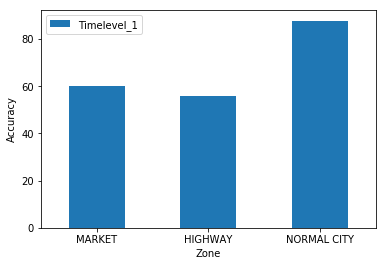

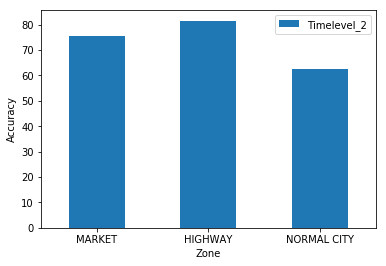

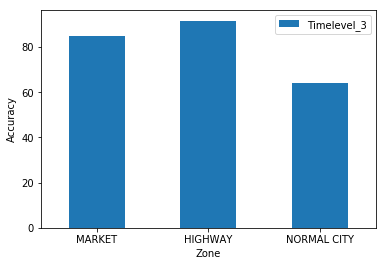

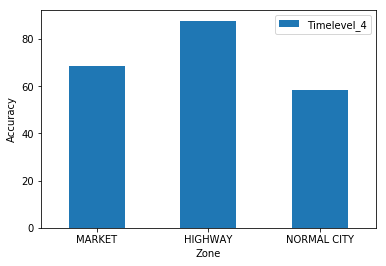

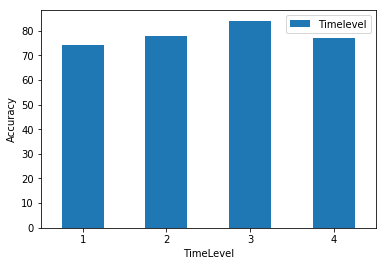

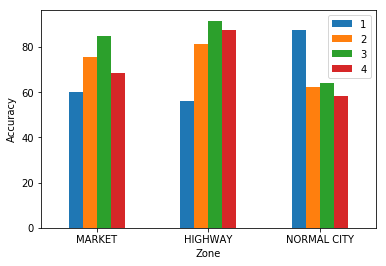

In [59]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

ax = d_1_d.plot.bar(rot=0)
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
ax.set(xlabel='Zone',ylabel='Accuracy')
ax=d_2_d.plot.bar(rot=0)
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
ax.set(xlabel='Zone',ylabel='Accuracy')
ax=d_3_d.plot.bar(rot=0)
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
ax.set(xlabel='Zone',ylabel='Accuracy')
ax=d_4_d.plot.bar(rot=0)
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
ax.set(xlabel='Zone',ylabel='Accuracy')



ax=d_acc_d.plot.bar(rot=0)
ax.set_xticklabels(['1','2','3','4'])
ax.set(xlabel='TimeLevel',ylabel='Accuracy')
ax = d_data.plot.bar(rot=0)
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
ax.set(xlabel='Zone',ylabel='Accuracy')



Text(0,0.5,'Accuracy')

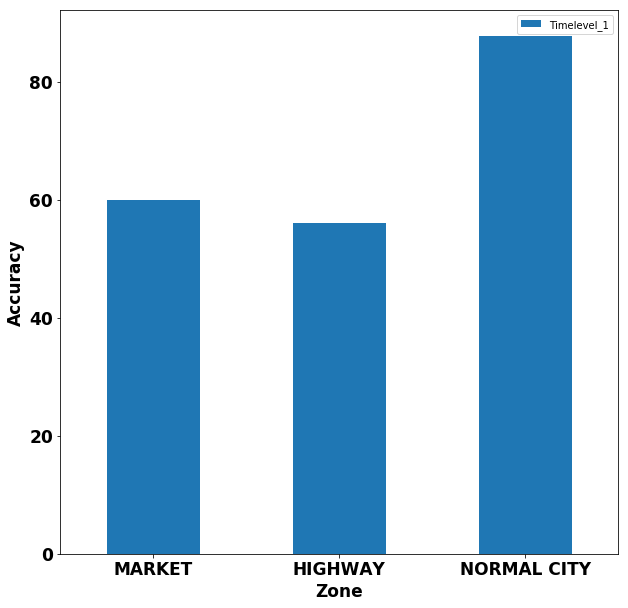

In [136]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

ax = d_1_d.plot.bar(rot=0,figsize=(10,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')


Text(0,0.5,'Accuracy')

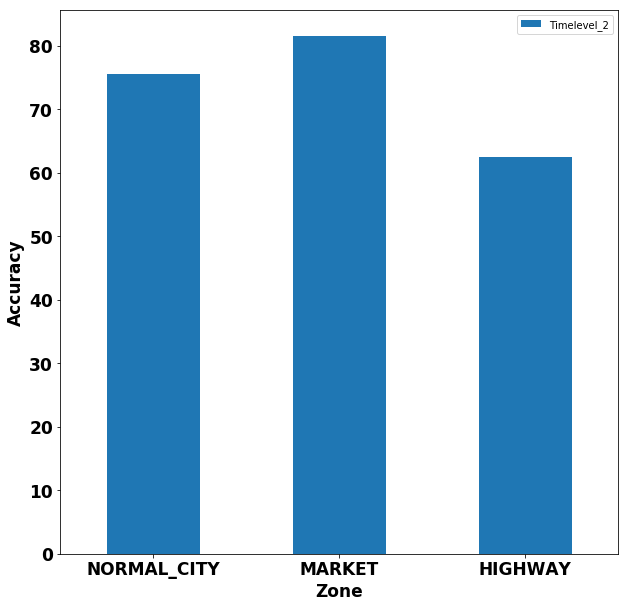

In [138]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

ax=d_2_d.plot.bar(rot=0,figsize=(10,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL_CITY','MARKET','HIGHWAY'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')


Text(0,0.5,'Accuracy')

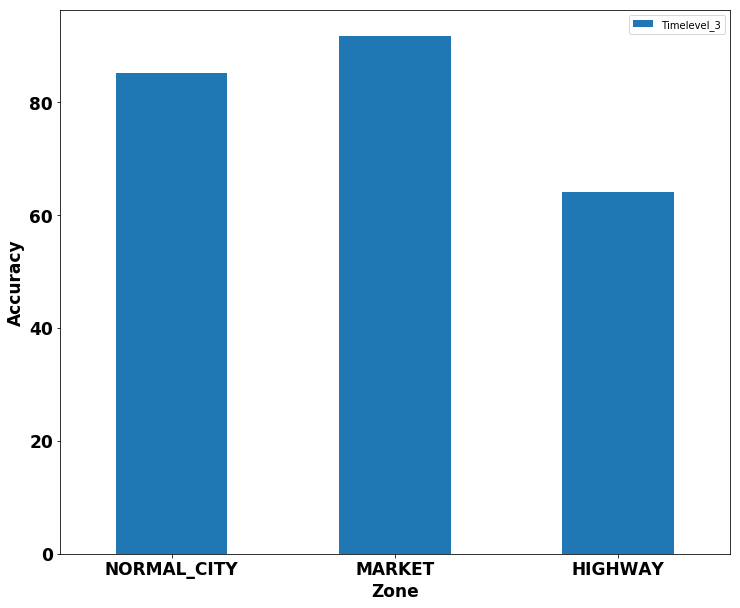

In [135]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

ax=d_3_d.plot.bar(rot=0,figsize=(12,10))
#ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'])
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL_CITY','MARKET','HIGHWAY'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=17,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=17,fontweight='bold')


Text(0,0.5,'Accuracy')

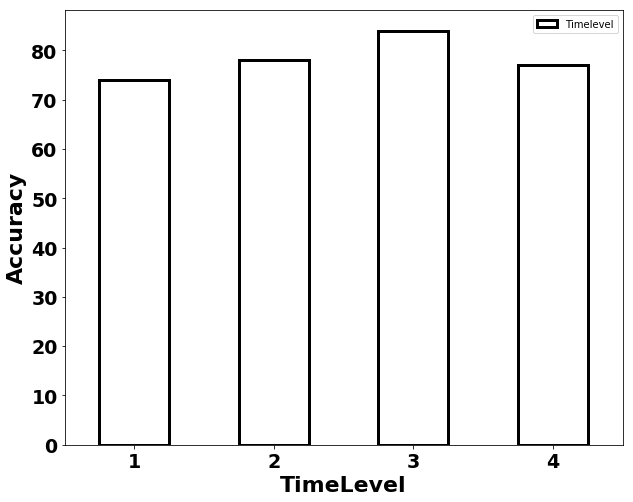

In [174]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

ax=d_acc_d.plot.bar(rot=0,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3)
#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Accuracy')
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['1','2','3','4'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('TimeLevel',fontsize=22,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=22,fontweight='bold')


Text(0,0.5,'Accuracy')

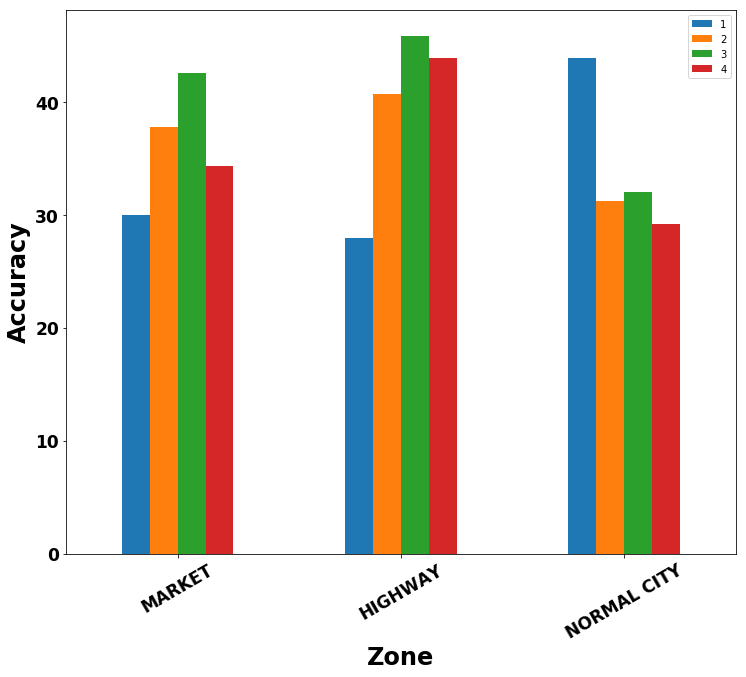

In [189]:
import pandas as pd

d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)
d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)
d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

ax = d_data.plot.bar(rot=30,figsize=(12,10))
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':17,'fontweight':'bold'})
ax.set_xticklabels(['MARKET','HIGHWAY','NORMAL CITY'],{'fontsize':17,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=24,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=24,fontweight='bold')


0    87.0
dtype: float64
0    60.5
dtype: float64
0    73.25
dtype: float64
0    3.741657
dtype: float64
0    3.696846
dtype: float64
0    11.814539
dtype: float64


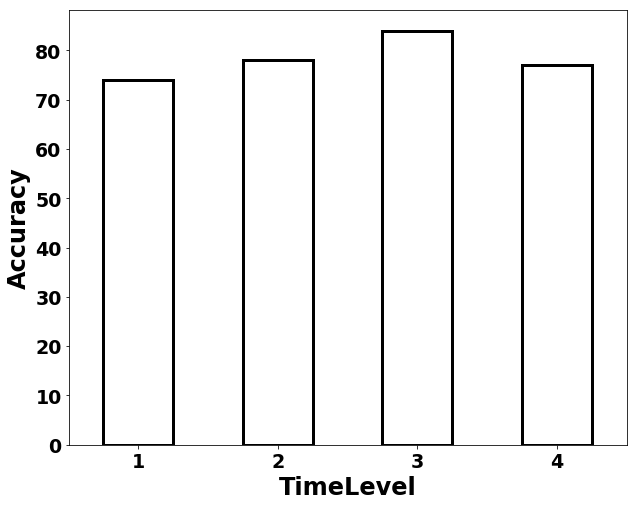

In [186]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,56,87.73],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

print(m_mean)
print(h_mean)
print(n_mean)

print(m_std)
print(h_std)
print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=d_acc_d.plot.bar(rot=0,figsize=(10,8),fontsize=17,color=(0,0,0,0),edgecolor='black',linewidth=3)
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['1','2','3','4'],{'fontsize':19,'fontweight':'bold'})
ax.set_xlabel('TimeLevel',fontsize=24,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()

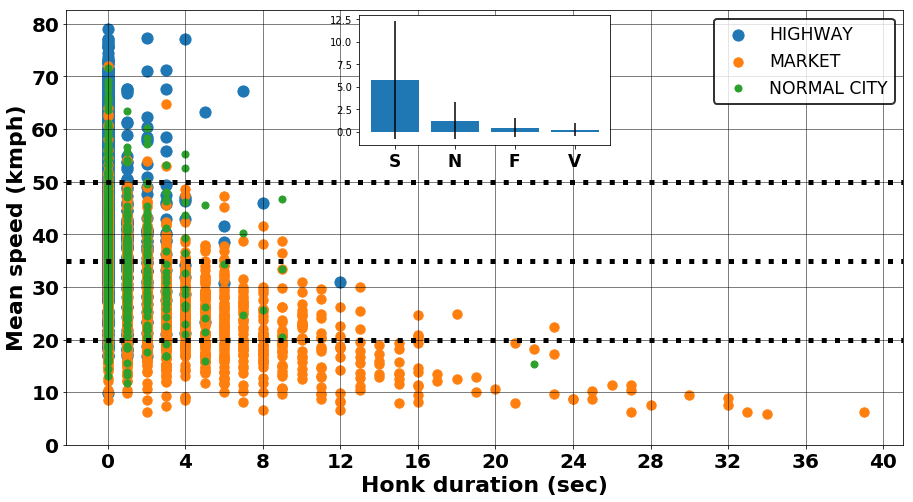

In [68]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
data_df=pd.read_csv('6mar.csv')

x=data_df['Honk_duration'].values
y=data_df['Mean_speed_kmph'].values
labels = data_df['Zone'].values
df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')

# Plot
fig, ax = plt.subplots(figsize=(15,8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
s= 500
for name, group in groups:
    ax.scatter(group.x, group.y, marker='.',s=s, label=name)
    s = s- 150

leg = plt.legend(('HIGHWAY','MARKET','NORMAL CITY'),fontsize ='xx-large')
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(2)

for i in [20,35,50]:
  plt.axhline(y=i,linestyle=':',linewidth=5,color='k')
ax.set_xlabel('Honk duration (sec)',fontsize = 22,fontweight='bold')
ax.set_ylabel('Mean speed (kmph)',fontsize = 22,fontweight='bold')
plt.xticks(np.arange(0, max(x)+3, 4),fontsize = 20,fontweight='bold')
plt.yticks(np.arange(0, 90,10),fontsize = 20,fontweight='bold')

plt.grid(color='k', linestyle='-', linewidth=1,alpha=0.5)

sl = data_df['Honk_duration'][data_df['Class'] == 'Slow'].values
no = data_df['Honk_duration'][data_df['Class'] == 'Normal'].values
fa = data_df['Honk_duration'][data_df['Class'] == 'Fast'].values
vf = data_df['Honk_duration'][data_df['Class'] == 'Very Fast'].values
sl_mean = np.mean(sl)
no_mean = np.mean(no)
fa_mean = np.mean(fa)
vf_mean = np.mean(vf)
sl_std = np.std(sl)
no_std = np.std(no)
fa_std = np.std(fa)
vf_std = np.std(vf)
# Create lists for the plot
Classes = ['S', 'N', 'F','V']
x_pos = np.arange(len(Classes))
CHs = [sl_mean, no_mean, fa_mean, vf_mean]
error = [sl_std, no_std, fa_std, vf_std]
# Create inset of width 30% and height 30% of the parent axes' bounding box at the lower left corner (loc=3)
axins = inset_axes(ax, width="30%", height="30%", loc='upper center')
axins.bar(x_pos, CHs, align='center',yerr=error, alpha=1, ecolor='black')
#axins.set_yticklabels({'fontsize':17,'fontweight': 'bold'})
axins.set_xticklabels(['','S', 'N', 'F','V'],{'fontsize':17,'fontweight': 'bold'})
plt.show()

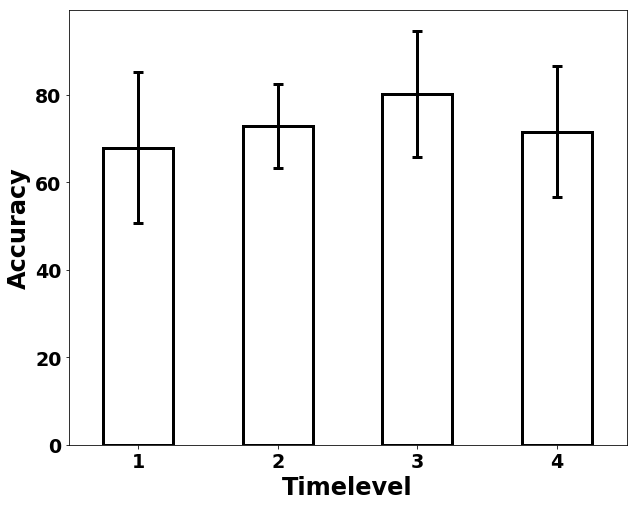

In [180]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,56,87.73],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
d_total=[[60,75.55,85.09,68.7],[56,81,91.7,87.78],[87.73,62.4,64,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

total_mean=d_total_d.mean()
total_mean_d=pd.DataFrame(total_mean)
total_std=d_total_d.std()
total_std_d=pd.DataFrame(total_std)

#print(total_mean)
#rint(total_std)
#print(m_mean)
#print(h_mean)
#print(n_mean)

#print(m_std)
#print(h_std)
#print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=total_mean_d.plot.bar(yerr=total_std_d,rot=0,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3,error_kw=dict(lw=3,capsize=5,capthick=3))

#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Mean Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['1','2','3','4'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Timelevel',fontsize=24,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()

           0
0  10.620604
1   4.226641
2   3.670408
         0
0  72.3350
1  87.2475
2  60.1825


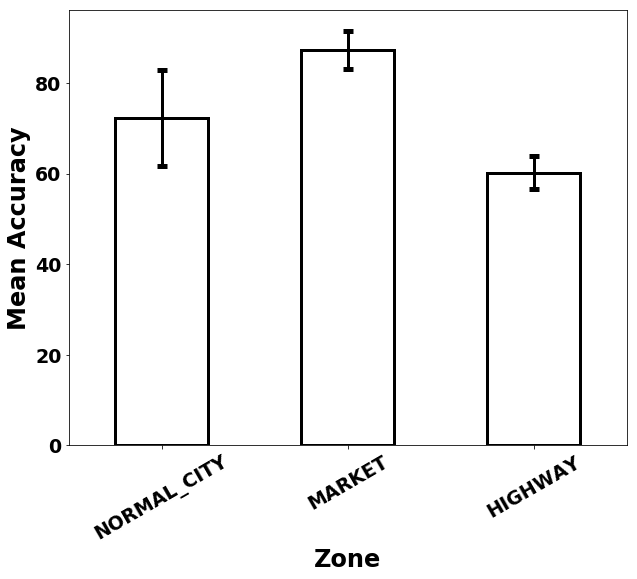

In [2]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,88,56],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
#d_total=[[60,75.55,85.09,68.7],[56,81,91.7,87.78],[87.73,62.4,64,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

total_mean=d_total_d.mean()
total_mean_d=pd.DataFrame(total_mean)
total_std=d_total_d.std()
total_std_d=pd.DataFrame(total_std)
print(total_std_d)

print(total_mean_d)

#print(total_mean)
#rint(total_std)
#print(m_mean)
#print(h_mean)
#print(n_mean)

#print(m_std)
#print(h_std)
#print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=total_mean_d.plot.bar(yerr=total_std_d,rot=30,figsize=(10,8),color=(0,0,0,0),edgecolor='black',linewidth=3,error_kw=dict(lw=3,capsize=5,capthick=5))

#ax.set_xticklabels(['Normal_city','Market','Highway'])
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['NORMAL_CITY','MARKET','HIGHWAY'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Zone',fontsize=24,fontweight='bold')
ax.set_ylabel('Mean Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()


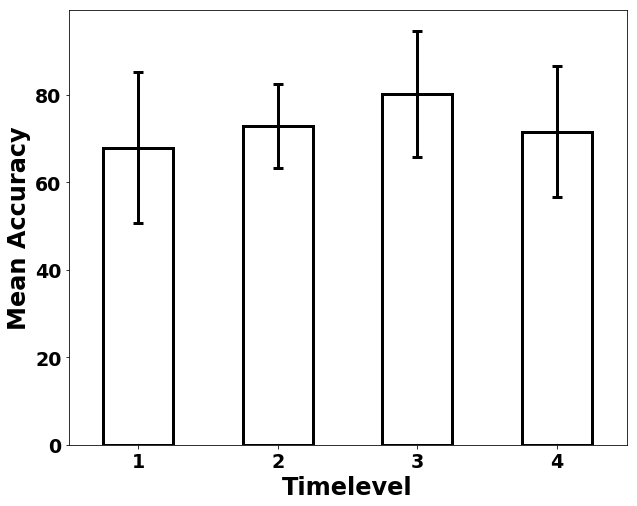

In [206]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,56,87.73],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
d_total=[[60,75.55,85.09,68.7],[56,81,91.7,87.78],[87.73,62.4,64,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

total_mean=d_total_d.mean()
total_mean_d=pd.DataFrame(total_mean)
total_std=d_total_d.std()
total_std_d=pd.DataFrame(total_std)

#print(total_mean)
#rint(total_std)
#print(m_mean)
#print(h_mean)
#print(n_mean)

#print(m_std)
#print(h_std)
#print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=total_mean_d.plot.bar(yerr=total_std_d,rot=0,figsize=(10,8),legend='none',color=(0,0,0,0),edgecolor='black',linewidth=3,error_kw=dict(lw=3,capsize=5,capthick=3))

#ax.set_xticklabels(['1','2','3','4'])
#ax.set(xlabel='TimeLevel',ylabel='Mean Accuracy')
ax.set_yticklabels(['0','20','40','60','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['1','2','3','4'],{'fontsize':19,'fontweight':'bold'})
#ax.set(xlabel='Zone',ylabel='Accuracy')
ax.set_xlabel('Timelevel',fontsize=24,fontweight='bold')
ax.set_ylabel('Mean Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()



0    87.0
dtype: float64
0    60.5
dtype: float64
0    73.25
dtype: float64
0    3.741657
dtype: float64
0    3.696846
dtype: float64
0    11.814539
dtype: float64


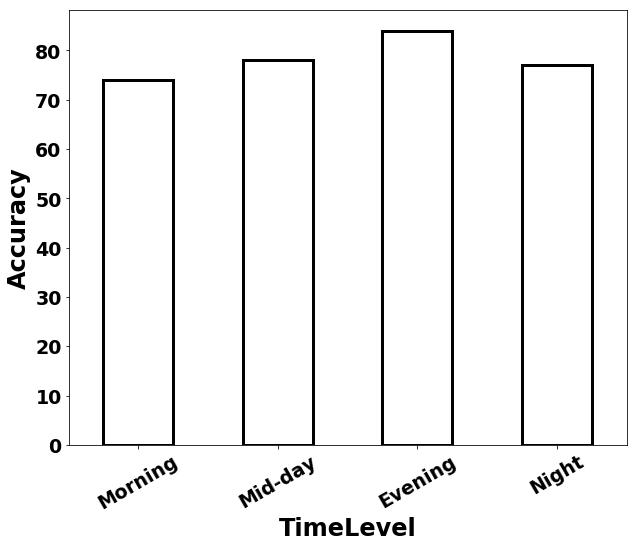

In [3]:
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
d={'1':[60,56,87.73],'2':[75.55,81.51,62.4],'3':[85.09,91.7,64],'4':[68.7,87.78,58.33]}
d_data=pd.DataFrame(d)
d_1={'Timelevel_1':[60,56,87.73]}
d_1_d=pd.DataFrame(d_1)

d_2={'Timelevel_2':[75.55,81.51,62.4]}
d_2_d=pd.DataFrame(d_2)


d_3={'Timelevel_3':[85.09,91.7,64]}
d_3_d=pd.DataFrame(d_3)
d_4={'Timelevel_4':[68.7,87.78,58.33]}
d_4_d=pd.DataFrame(d_4)
d_acc={'Timelevel':[74,78,84,77]}
d_acc_d=pd.DataFrame(d_acc)

d_total=[[60,56,87.73],[75.55,81.51,62.4],[85.09,91.7,64],[68.7,87.78,58.33]]
d_total_d=pd.DataFrame(d_total)
d_m=[88,82,91,87]
d_m_d=pd.DataFrame(d_m)
d_h=[56,63,64,59]
d_h_d=pd.DataFrame(d_h)
d_n=[60,76,88,69]
d_n_d=pd.DataFrame(d_n)

m_mean=d_m_d.mean()
m_std=d_m_d.std()

h_mean=d_h_d.mean()
h_std=d_h_d.std()

n_mean=d_n_d.mean()
n_std=d_n_d.std()

print(m_mean)
print(h_mean)
print(n_mean)

print(m_std)
print(h_std)
print(n_std)


d_total_d=pd.DataFrame(d_total)


ax=d_acc_d.plot.bar(rot=30,figsize=(10,8),fontsize=17,color=(0,0,0,0),edgecolor='black',linewidth=3)
ax.set_yticklabels(['0','10','20','30','40','50','60','70','80'],{'fontsize':19,'fontweight':'bold'})
ax.set_xticklabels(['Morning','Mid-day','Evening','Night'],{'fontsize':19,'fontweight':'bold'})
ax.set_xlabel('TimeLevel',fontsize=24,fontweight='bold')
ax.set_ylabel('Accuracy',fontsize=24,fontweight='bold')
ax.get_legend().remove()